# PHASE 1 — Create a Simple Dataset (House Price Example)

In [ ]:
# Import numpy for numerical arrays
import numpy as np

# Create house size data (in square feet)
# Each value represents the size of one house
house_size = np.array([500, 700, 900, 1100, 1300])

# Create house price data (in lakhs)
# Each value represents price of the corresponding house
house_price = np.array([20, 30, 42, 55, 68])

# PHASE 2 — Create X (Features) and y (Target)

In [ ]:
# X represents input features
# We reshape because sklearn expects 2D input
X = house_size.reshape(-1, 1)

# y represents output target
y = house_price

In [ ]:
X = house_size.reshape(-1, 1)

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5, 1)
Shape of y: (5,)


# PRINT DATA FOR VISUALIZATION

In [ ]:
print("House Size (X):")
print(X)

print("House Price (y):")
print(y)


House Size (X):
[[ 500]
 [ 700]
 [ 900]
 [1100]
 [1300]]
House Price (y):
[20 30 42 55 68]


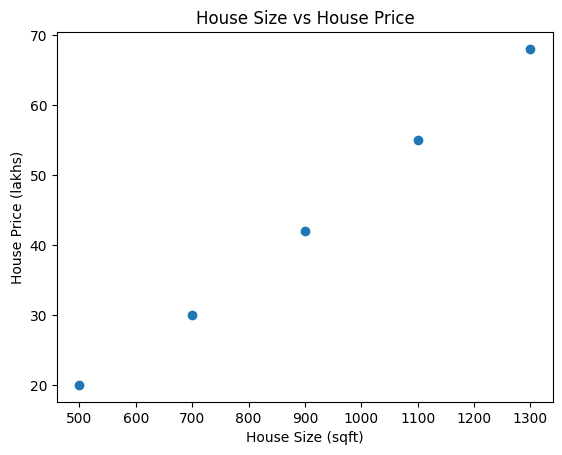

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(X, y)

# Label x-axis
plt.xlabel("House Size (sqft)")

# Label y-axis
plt.ylabel("House Price (lakhs)")

# Give the plot a title
plt.title("House Size vs House Price")

# Display the plot
plt.show()

---

# Common Beginner Mistakes to Warn

1. Forgetting reshape
2. Mixing X and y
3. Unequal length of arrays

---

"Machine Learning starts with **data formatting**, not algorithms."

---

# PHASE 3 — Split Data into Training and Testing Sets
---

### Purpose

We never train and evaluate on the **same data**.

Why?

Because:

A student who memorizes answers ≠ a student who understands.

Same for models.

---


In [ ]:
# Import function to split dataset
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
print("Training Input (X_train):")
print(X_train)

print("Testing Input (X_test):")
print(X_test)

print("Training Output (y_train):")
print(y_train)

print("Testing Output (y_test):")
print(y_test)

Training Input (X_train):
[[1300]
 [ 900]
 [ 500]
 [1100]]
Testing Input (X_test):
[[700]]
Training Output (y_train):
[68 42 20 55]
Testing Output (y_test):
[30]


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4, 1)
X_test shape: (1, 1)
y_train shape: (4,)
y_test shape: (1,)


# PHASE 4 — Create the Linear Regression Model

---
### Purpose

Choose which learning algorithm will be used.

Not training yet.
Not predicting yet.

Only creating an empty brain.

---

In [ ]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Create the model object
model = LinearRegression()

In [ ]:
print(model)

LinearRegression()


---

# Teaching Moment

Many ML algorithms exist:

* Linear Regression
* Decision Tree
* Neural Network
* SVM

But they all follow same pattern:

Create → Fit → Predict

Changing model = changing engine.

Pipeline remains same.

---

# Concept Lock-In

We choose the algorithm before learning begins.

---

At this point we have:

✔ Data
✔ Split
✔ Model object

Everything is ready.

The next phase:

Phase 5 — Train the model using `.fit()`

That is when the machine finally learns.


# PHASE 5 — Train (Fit) the Model
### Purpose

Let the model study patterns in training data.

In [ ]:
# Train the model using training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Slope (a):", model.coef_)
print("Intercept (b):", model.intercept_)

Slope (a): [0.05985714]
Intercept (b): -10.614285714285714


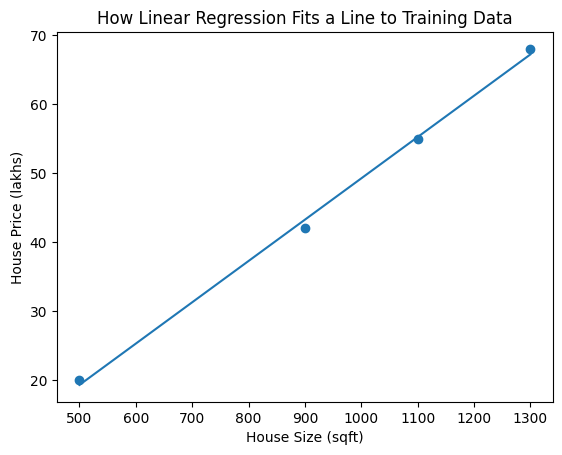

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Generate X values for line (using training data range)
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Compute predicted y values using learned model
y_line = model.predict(X_line)

# Plot training data points
plt.scatter(X_train, y_train)

# Plot learned regression line
plt.plot(X_line, y_line)

# Labels
plt.xlabel("House Size (sqft)")
plt.ylabel("House Price (lakhs)")
plt.title("How Linear Regression Fits a Line to Training Data")

# Show plot
plt.show()


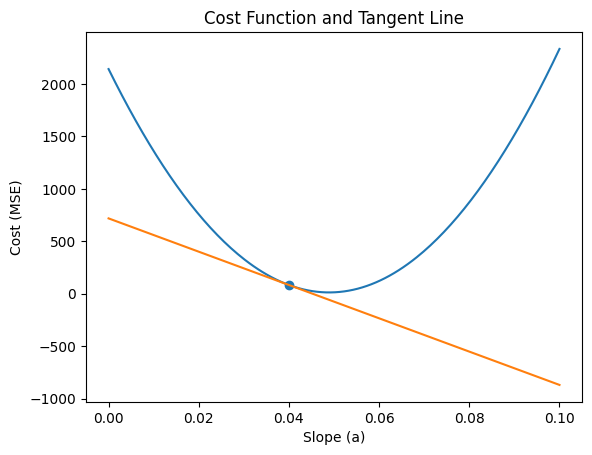

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fix intercept
b = 0

# Cost function (MSE)
def cost(a):
    y_pred = a * X + b
    return np.mean((y - y_pred) ** 2)

# Gradient of cost w.r.t slope a
def gradient(a):
    y_pred = a * X + b
    return -2 * np.mean(X * (y - y_pred))

# Range of slope values
a_values = np.linspace(0, 0.1, 200)
cost_values = [cost(a) for a in a_values]

# Choose a point for tangent
a0 = 0.04
c0 = cost(a0)
grad0 = gradient(a0)

# Tangent line equation: y = m(x-a0) + c0
tangent_y = grad0 * (a_values - a0) + c0

# Plot
plt.plot(a_values, cost_values)
plt.plot(a_values, tangent_y)
plt.scatter([a0], [c0])
plt.xlabel("Slope (a)")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function and Tangent Line")
plt.show()

# PHASE 6 — Predicting on Unseen Data

Goal

Use the trained model to predict prices for houses it has never seen before.

In [ ]:
# Use trained model to make predictions on test data
y_pred = model.predict(X_test)

# Print test inputs
print("Test House Sizes:")
print(X_test)

# Print actual prices
print("\nActual Prices:")
print(y_test)

# Print predicted prices
print("\nPredicted Prices:")
print(y_pred)

Test House Sizes:
[[700]]

Actual Prices:
[30]

Predicted Prices:
[31.28571429]


In [ ]:
error = y_test - y_pred
print("\nPrediction Error:")
print(error)


Prediction Error:
[-1.28571429]


In [ ]:
abs_error = np.abs(error)
print("\nAbsolute Error:")
print(abs_error)


Absolute Error:
[1.28571429]


In [ ]:
#Prediction is not copying.
#Prediction is estimation based on pattern.

new_house = np.array([[1000]])   # 1000 sqft house
new_price = model.predict(new_house)

print("\nPredicted price for 1000 sqft house:")
print(new_price)



Predicted price for 1000 sqft house:
[49.24285714]


# PHASE 7 — Evaluate Model Performance

Goal

Convert prediction quality into measurable numbers.

In [ ]:
# Import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 1.6530612244897933
Mean Absolute Error (MAE): 1.2857142857142847


# PHASE 8 — Visualize Predictions vs Actual

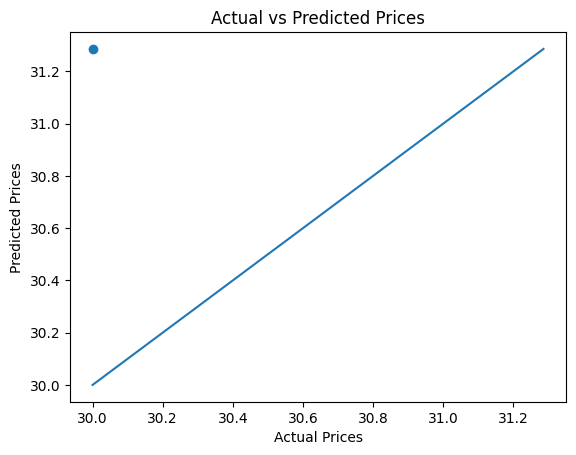

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred)

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

# Scale both axes to same range
#plt.xlim(min_val, 80)
#plt.ylim(min_val, 80)


plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

plt.show()


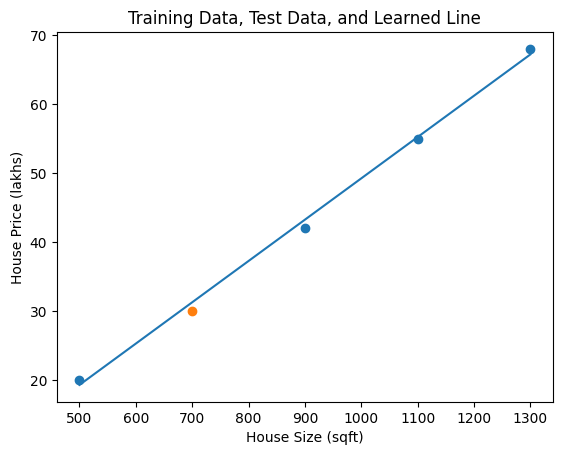

In [ ]:
# Create smooth X range
X_full = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_full_pred = model.predict(X_full)

# Plot training points
plt.scatter(X_train, y_train)

# Plot test points
plt.scatter(X_test, y_test)

# Plot regression line
plt.plot(X_full, y_full_pred)

plt.xlabel("House Size (sqft)")
plt.ylabel("House Price (lakhs)")
plt.title("Training Data, Test Data, and Learned Line")

plt.show()

In [ ]:
#Regression Using SVM and KNN

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Create models
svm_model = SVR(kernel="rbf")
knn_model = KNeighborsRegressor(n_neighbors=3)

# Train models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Print predictions
print("SVR Predictions:", y_pred_svm)
print("KNN Predictions:", y_pred_knn)


SVR Predictions: [47.10242457]
KNN Predictions: [39.]


In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:", y_pred_linear)
print("SVR:", y_pred_svm)
print("KNN:", y_pred_knn)


Linear Regression: [31.28571429]
SVR: [47.10242457]
KNN: [39.]


In [ ]:
from sklearn.metrics import mean_squared_error

print("Linear MSE:", mean_squared_error(y_test, y_pred_linear))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svm))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))

Linear MSE: 1.6530612244897933
SVR MSE: 292.49292610246187
KNN MSE: 81.0


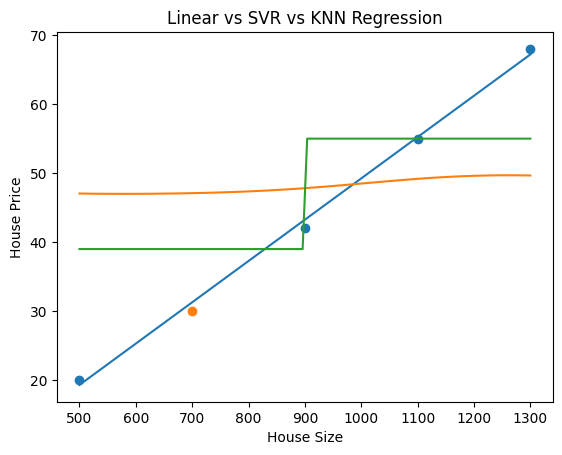

In [ ]:
0import numpy as np
import matplotlib.pyplot as plt

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.plot(X_line, linear_model.predict(X_line))
plt.plot(X_line, svm_model.predict(X_line))
plt.plot(X_line, knn_model.predict(X_line))

plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Linear vs SVR vs KNN Regression")

plt.show()
